# **Dataset BANCO**


El caso trata sobre un banco que está evaluando insertar una campaña para ofrecer un nuevo producto de Préstamo Personal a sus clientes internos. Esta campaña el banco la realizó el año pasado para sus clientes y mostró una tasa de conversión saludable de más del 9% de éxito. Esto lo ha animado a desarrollar un modelo para predecir si un cliente responderá favorablemente en adquirir el préstamo o no.

El archivo contiene datos sobre 5000 clientes. Los datos incluyen información demográfica del cliente, data del cliente con el banco y la respuesta del cliente a la última campaña de préstamos personales.
Entre estos 5000 clientes, solo 480 (= 9,6%) aceptaron el préstamo personal que se les ofreció en la campaña anterior.
$$ $$

VARIABLES:

▶ **ID:** ID del cliente

▶ **Age:** Edad del cliente

▶ **Experience:** Años de experiencia laboral

▶ **Income:** Ingresos anuales del cliente ( en miles)

▶ **ZIP Code:** Codigo postal de domicilio

▶ **Family:** Tamaño de familia

▶ **CCAvg:** Consumo Promedio en su Tarjetas de Crédito, de manera mensual

▶ **Education:** Nivel de Educación. 1: Secundaria Completa, 2: Educación Superior Completa, 3: Educación Avanzada

▶ **Mortgage:** Valor de la hipoteca de la casa, si corresponde (en miles)

▶ **Securities_Account:** Cuenta de valores

▶	**CD_Account:** ¿Tiene el cliente una cuenta de certificado de depósito (CD) con el banco?

▶	**Online:** ¿Utiliza el cliente servicios bancarios por Internet?

▶	**CreditCard:** ¿El cliente utiliza una tarjeta de crédito emitida por el banco?

▶ **Target:** ¿Este cliente aceptó el préstamo personal ofrecido en la última campaña?
0: No
1: Si

IMPORTAMOS LAS LIBRERIAS

In [ ]:
# libreria para funciones estadisticas
import numpy as np 
# libreria para dataframes
import pandas as pd
# librerias de graficos
import matplotlib.pyplot as plt
import seaborn as sns
# comando para poder graficar en una sola linea
%matplotlib inline

IMPORTAMOS EL DATASET

In [ ]:
df=pd.read_csv("/content/data_loan.csv", sep=";")

## **Entender el problema**

In [ ]:
#Mostramos los 5 primeros datos del dataframe
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Target
0,1,25.0,1,49.0,91107,4,1.6,1,0,1,0,0,0,0
1,2,45.0,19,34.0,90089,3,1.5,1,0,1,0,0,0,0
2,3,39.0,15,11.0,94720,1,1.0,1,0,0,0,0,0,0
3,4,35.0,9,100.0,94112,1,2.7,2,0,0,0,0,0,0
4,5,35.0,8,45.0,91330,4,1.0,2,0,0,0,0,1,0


In [ ]:
#Mostraremos todos los nombres de las columnas
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'Target'],
      dtype='object')

In [ ]:
#Veamos cuantos datos contiene nuestro DataFrame
len(df)

5000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


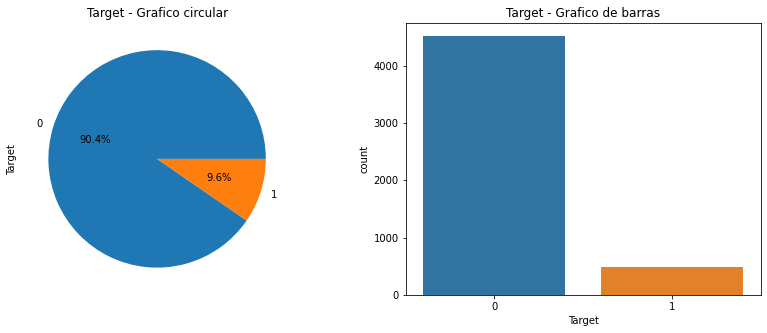

In [ ]:
#Graficaremos 2 tipos de grafico para poder analizar la variable target
f, ax = plt.subplots(1,2,figsize=(14,5))
df["Target"].value_counts().plot.pie(autopct="%1.1f%%", ax = ax[0])
ax[0].set_title("Target - Grafico circular")

sns.countplot("Target", data=df, ax = ax[1])
ax[1].set_title("Target - Grafico de barras")
plt.show()

En la grafica de pastel podemos verificar lo que se dijo en el enunciado, que solo el 9.6% de las personas acepto el prestamo personal ofrecido en la ultima campaña.

En el grafico de barras se puede evidenciar los mismo.


In [ ]:
#averiguemos cuantos datos nulos tenemos entre nuestros datos 
df.isnull().sum()

ID                     0
Age                   25
Experience             0
Income                12
ZIP_Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
Target                 0
dtype: int64

Las variables Age e Income contienen algunos valores nulos
______________

## **1. EDA**

### 1.1. ID (Variable continua)

In [ ]:
print("Variable Continua. Existen ",len(df["ID"].unique()))

Variable Continua. Existen  5000


Podemos observar que el ID es mas como un conteo de la cantidad de personas de la data. Veamos que tanta importancia tiene en la variable target.


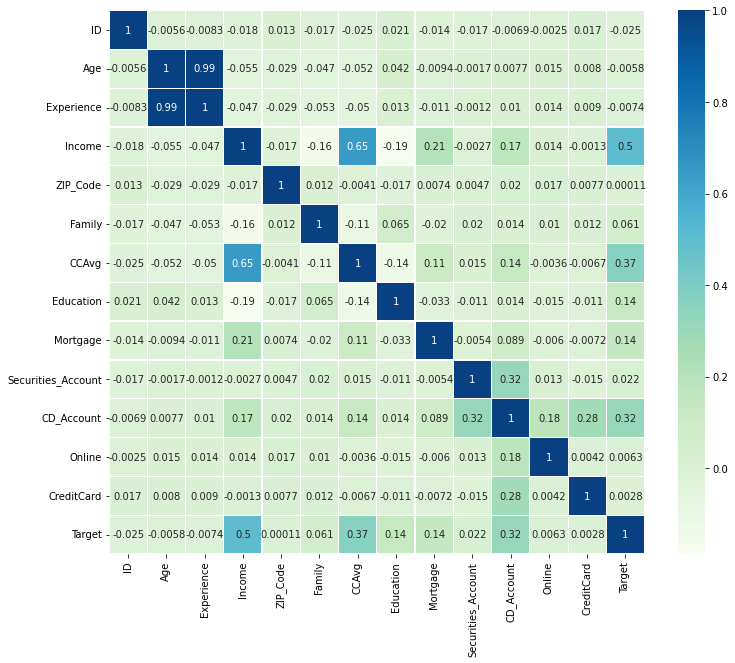

In [ ]:
sns.heatmap(df.corr(),annot=True,cbar= True,cmap='GnBu',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Solo tiene un -0.025 de correlacion con la variable Target, seria recomendable eliminarla.

In [ ]:
df1 = df.drop(['ID'], axis=1)

Se elimino la variable **ID**, sin embargo se puede observar mas variables que tienen una baja correlacion con la variable Target, estaremos evaluando a estas mas adelante.
_____________

### 1.2. Age (Variable continua)

In [ ]:
df["Age"].unique()

array([25., 45., 39., 35., 37., 53., 50., 34., nan, 48., 59., 67., 60.,
       38., 42., 46., 55., 56., 57., 29., 44., 36., 43., 40., 30., 31.,
       32., 61., 41., 28., 49., 47., 62., 58., 54., 33., 27., 65., 66.,
       24., 52., 51., 26., 64., 63., 23.])

In [ ]:
# Hallemos las edades minimas y maximas
print("El valor máximo de edad es: ", df["Age"].max())
print("El valor minimo de edad es: ", df["Age"].min())
print("El valor promedio de edad es: ", df["Age"].mean())

El valor máximo de edad es:  67.0
El valor minimo de edad es:  23.0
El valor promedio de edad es:  45.35557788944724


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


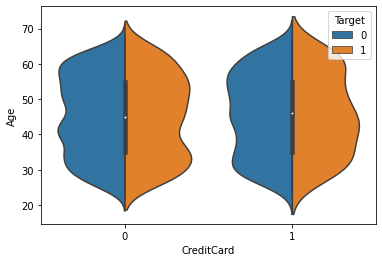

In [ ]:
sns.violinplot("CreditCard","Age", hue="Target", data=df, split=True)
plt.show()

Si observamos la grafica nos daremos cuenta que es muy parejo los datos de las personas que tienen tarjeto de credito y las que no tienen, ademas q su mayoria estan entre los 30 y 60.


Trataremos los valores nulos de Age:

In [ ]:
df["Age"].fillna(45, inplace = True)

In [ ]:
df["Age"].isnull().any()

False

Se hizo una imputación de missing por el promedio = 45

Sin embargo si observamos el **Diagrama de correlacion** podemos ver que la variable **Age** no es muy relevante para nuestra variable target pues solo tiene -0.0058 de correlacion, por lo tanto procederemos tambien a eliminarla.

In [ ]:
df1 = df1.drop(['Age'], axis=1)

_______________________

### 1.3. Experience (Variable continua)

In [ ]:
print("Los años de experiencia maxima es: ", df["Experience"].max())
print("los años de experiencia minima es", df["Experience"].min())
print("El valor promedio de años de experiencia es: ", df["Experience"].mean())

Los años de experiencia maxima es:  43
los años de experiencia minima es -3
El valor promedio de años de experiencia es:  20.1046


In [ ]:
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

podemos observar que existen 3 valores en negativo, por lo tanto tomaremos a estos como 0 años de experiencia

In [ ]:
df['Experience'].replace([-1,-2,-3],[0,0,0],inplace=True)

In [ ]:
print("Los años de experiencia maxima es: ", df["Experience"].max())
print("los años de experiencia minima es", df["Experience"].min())
print("El valor promedio de años de experiencia es: ", df["Experience"].mean())

Los años de experiencia maxima es:  43
los años de experiencia minima es 0
El valor promedio de años de experiencia es:  20.1196


Ahora si obtuvimos datos mas reales

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


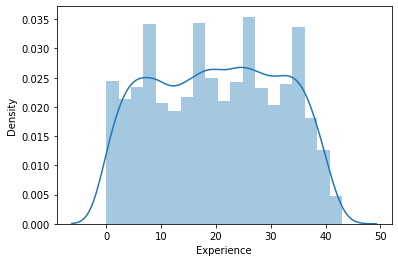

In [ ]:
sns.distplot(df["Experience"])

Por el grafico podemos llegar a concluir que los años de experiencia se centran en entre los 10, los 18, los 25 y los 35 años.


_________

### 1.4. Income (Variable continua)

In [ ]:
df["Income"].unique()

array([ 49.,  34.,  11., 100.,  45.,  29.,  72.,  22.,  81., 180., 105.,
       114.,  40., 112., 130., 193.,  21.,  25.,  63.,  62.,  43., 152.,
        83., 158.,  48., 119.,  35.,  41.,  18.,  50., 121.,  71., 141.,
        80.,  84.,  60., 132., 104.,  52., 194.,   8., 131.,  nan, 190.,
        44., 139.,  93., 188.,  39., 125.,  32.,  20., 115.,  69.,  85.,
       135.,  12.,  19.,  82., 109.,  42.,  78.,  51., 113., 118.,  64.,
       161.,  94.,  15.,  74.,  30.,  38.,   9.,  92.,  61.,  73.,  70.,
       149.,  98., 128.,  31.,  58.,  54., 124., 163.,  24.,  79., 134.,
        23.,  13., 138., 171., 168.,  65.,  10., 148., 159., 169., 144.,
       165.,  59.,  91., 172.,  55., 155.,  53.,  89.,  28.,  75., 170.,
       120.,  99., 111.,  33., 129., 122., 150., 195., 110., 101., 191.,
       140.,  68., 153., 173., 174.,  90., 133., 179., 145., 200., 183.,
       182.,  88., 160., 205., 164.,  14., 175., 103., 108., 185., 204.,
       154., 102., 192., 202., 162., 142.,  95., 18

In [ ]:
print("El maximo ingreso anual es: ", df["Income"].max())
print("el minimo ingreso anual es: ", df["Income"].min())
print("El valor promedio del ingreso anual es: ", df["Income"].mean())

El maximo ingreso anual es:  224.0
el minimo ingreso anual es:  8.0
El valor promedio del ingreso anual es:  73.78849238171613


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


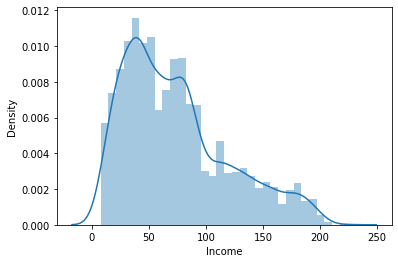

In [ ]:
sns.distplot(df["Income"])

El ingreso anual se centra cerca de 50k.


Ahora haremos un tratamiento de los valores nulos de Income:

In [ ]:
df["Income"].fillna(73, inplace = True)
df1["Income"].fillna(73, inplace = True)

In [ ]:
df["Income"].isnull().any()

False

________________

### 1.5. ZIP code (Variable continua)

In [ ]:
print("El codigo postal maximo es: ", df["ZIP_Code"].max())
print("El codigo postal minimo es", df["ZIP_Code"].min())
print("El valor promedio de los codigos postales es: ", df["ZIP_Code"].mean())

El codigo postal maximo es:  96651
El codigo postal minimo es 9307
El valor promedio de los codigos postales es:  93152.503


Al ver el diagrama de correlacion podemos llegar a la conclucion de que la variable ZIP_Code tiene una correlacion de solo 0.00011 con el target, lo mejor sera eliminarlo.

In [ ]:
df1 = df1.drop(['ZIP_Code'], axis=1)

_______________

### 1.6. Family (Variable discreta)

In [ ]:
print("El tamaño maximo de la familia es: ", df["Family"].max())
print("El tamaño minimo de la familia es", df["Family"].min())
print("El valor promedio de la familia es: ", df["Family"].mean())

El tamaño maximo de la familia es:  4
El tamaño minimo de la familia es 1
El valor promedio de la familia es:  2.3964


In [ ]:
df["Family"].unique()

array([4, 3, 1, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


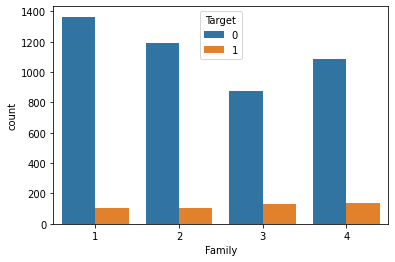

In [ ]:
sns.countplot("Family", hue="Target", data=df)
plt.show()

- En esta grafica podemos observar que es muy parejo la cantidad de personas que acepto el prestamo personal independientemente de la cantidad de la familia, pero en su gran mayoria son muchos los que no aceptaron.



In [ ]:
pd.crosstab([df["Family"]],[df["Target"]]).style.background_gradient(cmap='summer_r')

Target,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134


- Aqui podemos analizar mejor los datos, obserbamos que la familia de 4 personas le gana por 1 a la familia de 3 personas en aceptar el prestamo personal.
- Ademas las familias de 1 personas conforman la mayoria de personas que no aceptaron el prestamo personal.
______________

### 1.7. CCAvg (Variable continua)

In [ ]:
df["CCAvg"].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [ ]:
print("El maximo promedio mensual es: ", df["CCAvg"].max())
print("El minimo promedio mensual es", df["CCAvg"].min())
print("El valor promedio de los promedios mensuales es: ", df["CCAvg"].mean())

El maximo promedio mensual es:  10.0
El minimo promedio mensual es 0.0
El valor promedio de los promedios mensuales es:  1.9379380000000053


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


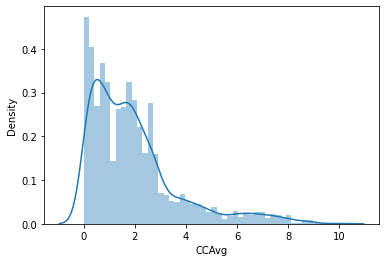

In [ ]:
sns.distplot(df["CCAvg"])

Observamos que el promedio mensual se centra entre 0 y 1

### 1.8. Education (Variable ordinal)

In [ ]:
print("El grado maximo es: ", df["Education"].max())
print("El grado minimo es", df["Education"].min())

El grado maximo es:  3
El grado minimo es 1


In [ ]:
df["Education"].unique()

array([1, 2, 3])

In [ ]:
pd.crosstab([df["Education"]],[df["Target"]]).style.background_gradient(cmap='summer_r')

Target,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


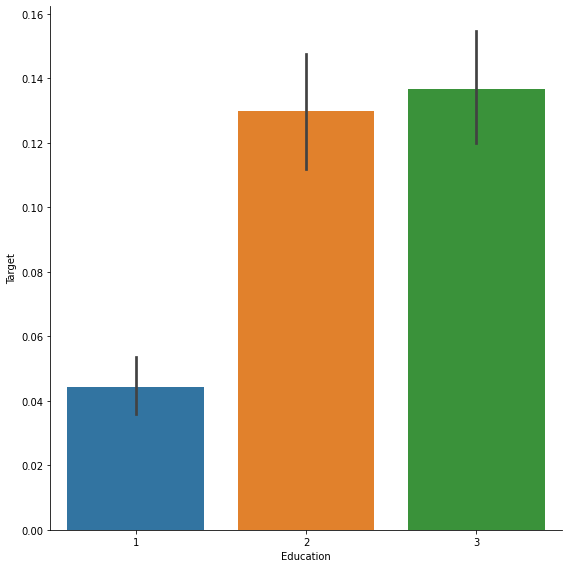

In [ ]:
g = sns.factorplot(x="Education",y="Target",data=df,kind="bar", size = 8 )
plt.show()

- La mayor cantidad de personas solo tienen secuntadaria completa y ademas son las que no aceptaron el prestamo personal
- La mayoria de personas que aceptaron el prestamo personal tienen educacion avanzada.
____________

### 1.9. Mortgage (Variable continua)

In [ ]:
print("El maximo valor de la hipoteca de la casa es: ", df["Mortgage"].max())
print("El minimo Valor de la hipoteca de la casa es", df["Mortgage"].min())
print("El promedio del Valor de la hipoteca de la casa es: ", df["Mortgage"].mean())

El maximo valor de la hipoteca de la casa es:  635
El minimo Valor de la hipoteca de la casa es 0
El promedio del Valor de la hipoteca de la casa es:  56.4988


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


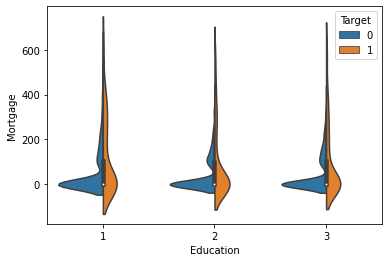

In [ ]:
sns.violinplot("Education","Mortgage", hue="Target", data=df, split=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


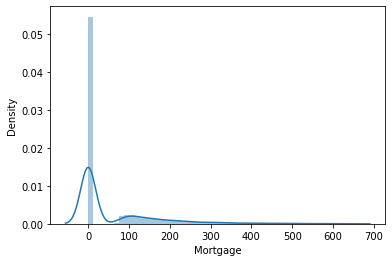

In [ ]:
sns.distplot(df["Mortgage"])

- Podemos observar que en su gran mayoria los datos se centran en personas que no tienen hipotecada sus casas.
- Asi mismo esas personas no aceptaron el prestamo personal.
_____________

### 1.10. Securities_Account (Variable discreta)

In [ ]:
df["Securities_Account"].unique()

array([1, 0])

In [ ]:
pd.crosstab([df["Securities_Account"]],[df["Target"]]).style.background_gradient(cmap='summer_r')

Target,0,1
Securities_Account,,
0,4058,420
1,462,60


- En su mayoria no se tiene una cuenta de valores.

____________

### 1.11. CD_Account (Variable discreta)

In [ ]:
df["CD_Account"].unique()

array([0, 1])

In [ ]:
pd.crosstab([df["CD_Account"]],[df["Target"]]).style.background_gradient(cmap='summer_r')

Target,0,1
CD_Account,,
0,4358,340
1,162,140


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


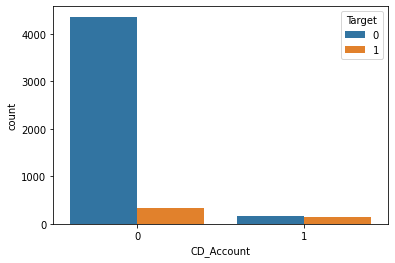

In [ ]:
sns.countplot("CD_Account", hue="Target", data=df)
plt.show()

- La mayoria de personasno cuentan con CD_Account.
- Ademas la mayoria de los que aceptaron el prestamo personal no cuentan con CD_account.
___________

### 1.12. Online (Variable discreta)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


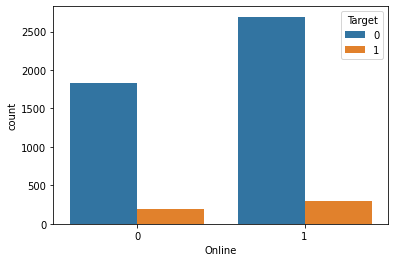

In [ ]:
sns.countplot("Online", hue="Target", data=df)
plt.show()

In [ ]:
pd.crosstab([df["Online"]],[df["Target"]]).style.background_gradient(cmap='summer_r')

Target,0,1
Online,,
0,1827,189
1,2693,291


- La mayoria de las personas usan servicios bancarios por internet.
- A la vez estos de estos 291 aceptaron el prestamo personal.
- Sin embargo si analizamos la correlacion,esta es solo de 0.0063 con el target, por lo cual procederemos a eliminarla.

In [ ]:
df1 = df1.drop(['Online'], axis=1)

___________

### 1.13. CreditCard (Variable discreta)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


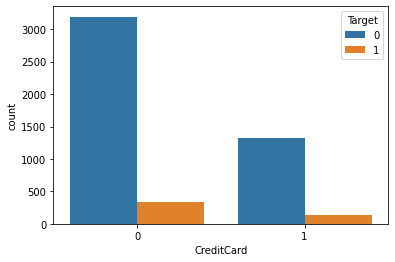

In [ ]:
sns.countplot("CreditCard", hue="Target", data=df)
plt.show()

In [ ]:
pd.crosstab([df["CreditCard"]],[df["Target"]]).style.background_gradient(cmap='summer_r')

Target,0,1
CreditCard,,
0,3193,337
1,1327,143


- En su mayoria no cuentan con tarjetas de creditos del banco.
- Los que aceptaron el prestamo personal son en su mayoria los que cuentan con tarjeta de credito del banco.
- Sin embargo, esta variable cuenta con solo 0.0028 de correlacion con el target porq lo que procederemos a eliminarla.

In [ ]:
df1 = df1.drop(['CreditCard'], axis=1)

______________

## **2. Feature engineering**

### 2.1 Creacion de variables


#### 2.1.1. Jovenes, Adultos o Mayores

In [ ]:
df3=df.copy()

In [ ]:
df3["Age"].unique()

array([25., 45., 39., 35., 37., 53., 50., 34., 48., 59., 67., 60., 38.,
       42., 46., 55., 56., 57., 29., 44., 36., 43., 40., 30., 31., 32.,
       61., 41., 28., 49., 47., 62., 58., 54., 33., 27., 65., 66., 24.,
       52., 51., 26., 64., 63., 23.])

In [ ]:
df3.loc[(df3["Age"]>22)&(df3["Age"]<33),'Age']=0  #Jovenes
df3.loc[(df3["Age"]>32)&(df3["Age"]<51),'Age']=1  #Adultos
df3.loc[(df3["Age"]>50)&(df3["Age"]<68),'Age']=2  #Mayores

#### 2.1.2. Solo o con familia

In [ ]:
df3["Family"].unique()

array([4, 3, 1, 2])

In [ ]:
df3.loc[(df3["Family"]==1),'Family']=1  #Solo
df3.loc[(df3["Family"]>1)&(df3["Family"]<5),'Family']=0  #Con familia

#### 2.1.3. Hipotecaron o no hipotecaron

In [ ]:
df3["Mortgage"].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [ ]:
df3.loc[(df3["Mortgage"]!=0),'Mortgage']=1 #Hipotecaron

In [ ]:
df3["Mortgage"].unique()

array([0, 1])

#### Conclusion

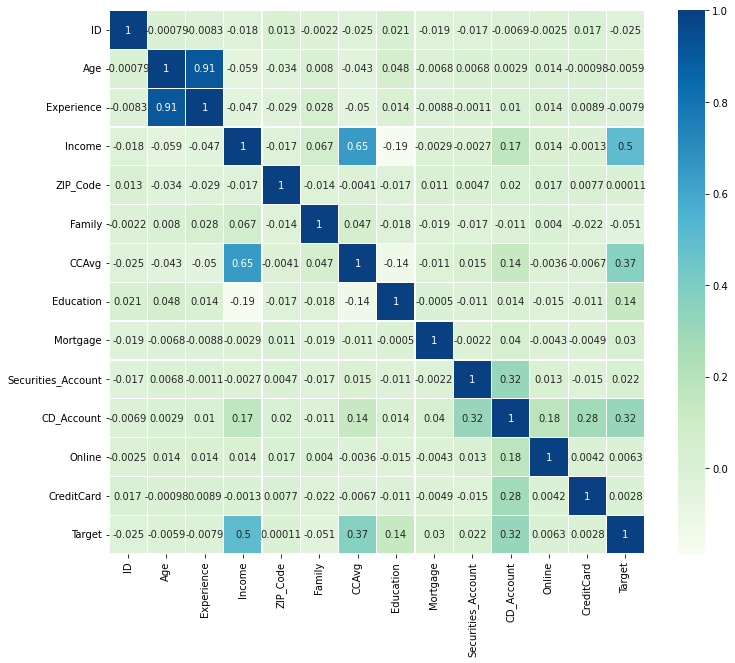

In [ ]:
sns.heatmap(df3.corr(),annot=True,cbar= True,cmap='GnBu',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Ninguna de las variables creadas hicieron que la correlacion mejorara significativamente. En el caso de la hipoteca hizo que nuestra correlacion disminuyera, por lo tanto no se tendra en cuenta estas variables en nuestra data.
_____________

### 2.2. Encoding

In [ ]:
df.dtypes

ID                      int64
Age                   float64
Experience              int64
Income                float64
ZIP_Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
Target                  int64
dtype: object

- No necesitamos hacer nada ya que todas nuestras variables son numericas.

### 2.3. Seleccion de variables


Tenemos a df1 que en un principio era similar a nuestra data original df, pero a este(df1) se le fueron eliminando las variables con una correlacion cercana a 0.

#### 2.3.1. Correlacion

**Esta es la correlacion sin eliminar las variables**

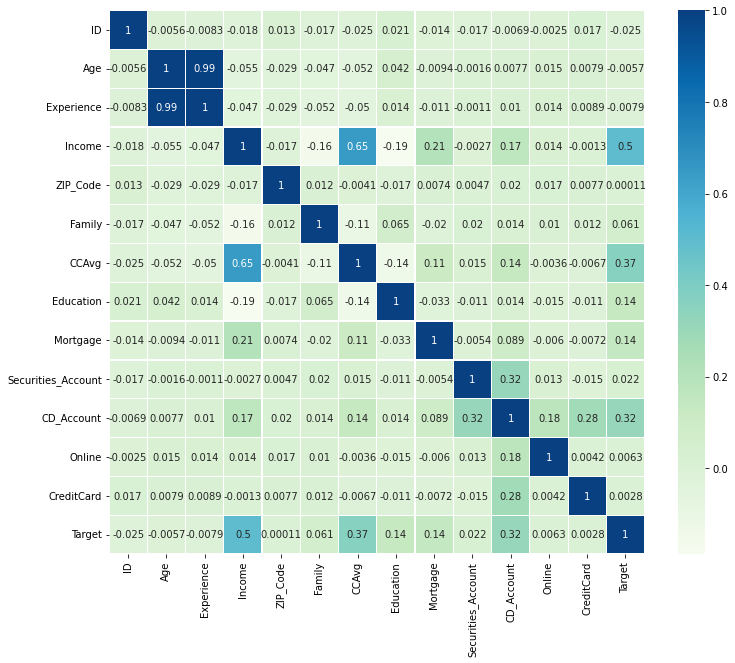

In [ ]:
sns.heatmap(df.corr(),annot=True,cbar= True,cmap='GnBu',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#Procederemos a igualar nuestra data original con la data simplificada
df=df1.copy()

**Esta es la grafica despues de haber eliminado las variables con una muy baja correlacion**

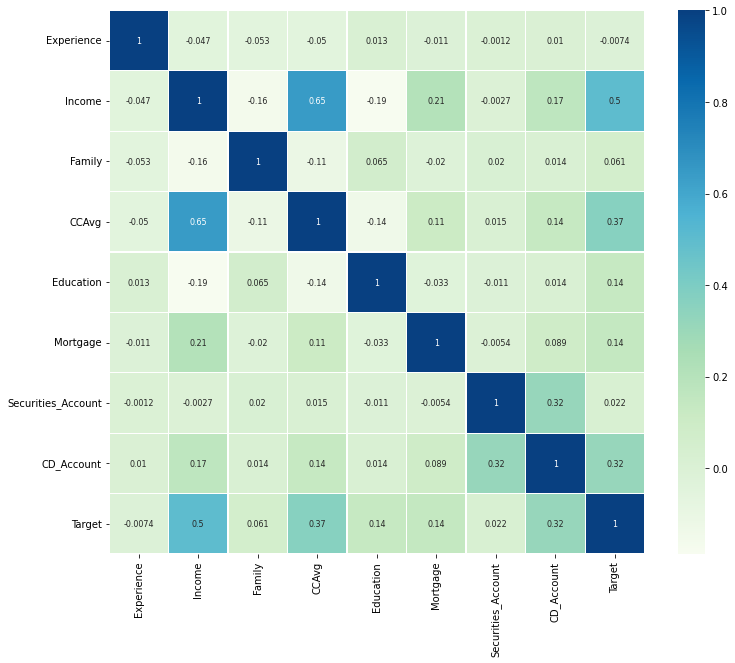

In [ ]:
sns.heatmap(df.corr(),annot=True,cbar= True,cmap='GnBu',linewidths=0.2,annot_kws={'size':8})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- En nuestro diagrama de correlacion podemos ver que Experience tiene una correlacion demasiado baja, asi como securities account y Family.

In [ ]:
X = df.drop(['Target'],axis=1)
y = df['Target']

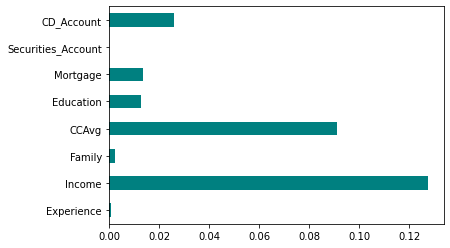

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance, X.columns)
feat_importance.plot(kind='barh', color='teal')

- Segun inf. values las variables debiles son: Securities_Account y Family.

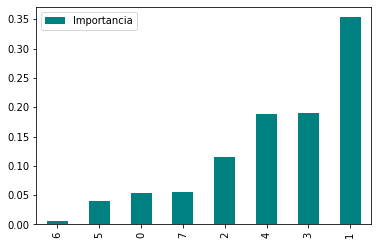

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300)
model.fit(X,y)

importances = model.feature_importances_

tree_df = pd.DataFrame({"Variables": pd.DataFrame(X).columns, 
                        "Importancia": importances})
tree_df.set_index("Importancia")

tree_df = tree_df.sort_values("Importancia")

tree_df.plot.bar(color = "teal")

- Segun RandomForest nuestras variables débiles es Securities_Account.

#### 2.3.2. Forward Selection

In [ ]:
#'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage','Securities_Account', 'CD_Account'
import statsmodels.api as sm
X_fw = df[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage','Securities_Account', 'CD_Account']].values

X_fw=sm.add_constant(X_fw)
model=sm.OLS(y,X_fw).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     433.7
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:17:19   Log-Likelihood:                 203.96
No. Observations:                5000   AIC:                            -391.9
Df Residuals:                    4992   BIC:                            -339.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3924      0.013    -30.064      0.000      -0.418      -0.367
x1             0.0030   9.73e-05     30.996      0.000       0.003       0.003
x2             0.0326      0.003     11.218      0.000       0.027       0.038
x3             0.0123      0.002      4.978      0.000       0.007       0.017
x4             0.0784      0.004     19.635      0.000       0.071       0.086
x5          7.254e-05   3.31e-05      2.190      0.029    7.59e-06       0.000
x6            -0.0509      0.011     -4.481      0.000      -0.073      -0.029
x7             0.2926      0.015     19.694      0.000       0.263       0.322
==============================================================================
Omnibus:                     1335.318   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3541.485
Skew:                           1.429   Prob(JB):                         0.00
Kurtosis:                       5.971   Cond. No.                         622.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Segun Selección progresiva nos quedamos con todas las variables a excepcion de la variable Experience.
____________

#### 2.3.3. Backward Elimination

In [ ]:
import statsmodels.api as sm

#columnas: ['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage','Securities_Account', 'CD_Account']
X_fw = df[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'CD_Account']].values

X_fw=sm.add_constant(X_fw)
model=sm.OLS(y,X_fw).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     433.7
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:17:19   Log-Likelihood:                 203.96
No. Observations:                5000   AIC:                            -391.9
Df Residuals:                    4992   BIC:                            -339.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3924      0.013    -30.064      0.000      -0.418      -0.367
x1             0.0030   9.73e-05     30.996      0.000       0.003       0.003
x2             0.0326      0.003     11.218      0.000       0.027       0.038
x3             0.0123      0.002      4.978      0.000       0.007       0.017
x4             0.0784      0.004     19.635      0.000       0.071       0.086
x5          7.254e-05   3.31e-05      2.190      0.029    7.59e-06       0.000
x6            -0.0509      0.011     -4.481      0.000      -0.073      -0.029
x7             0.2926      0.015     19.694      0.000       0.263       0.322
==============================================================================
Omnibus:                     1335.318   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3541.485
Skew:                           1.429   Prob(JB):                         0.00
Kurtosis:                       5.971   Cond. No.                         622.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Segun Selección progresiva nos quedamos con todas las variables menos con experience.

In [ ]:
df = df.drop(['Experience'], axis=1)

Entonces eliminamos Experience
______

## **3. Balanceo de dato y estrategia de division**

In [ ]:
df['Target'].value_counts()

0    4520
1     480
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


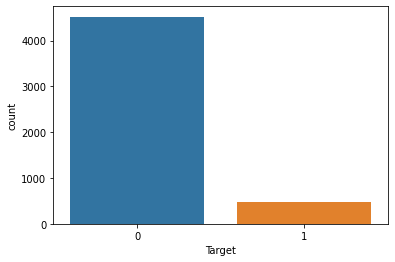

In [ ]:
g = sns.countplot(df['Target'])
g.set_xticklabels(['0','1'])
plt.show()

- Observamos que el desbalance es demasiado grande por lo que no es recomendable usar **UnderSampling**.

In [ ]:
class_count_0, class_count_1 = df['Target'].value_counts()

class_0 = df[df['Target'] == 0]
class_1 = df[df['Target'] == 1]
print('Target 0:', class_0.shape)
print('Target 1:', class_1.shape)

Target 0: (4520, 8)
Target 1: (480, 8)


In [ ]:
X = df.drop(['Target'],axis=1)
y = df['Target']

### 3.1. OverSampling

In [ ]:
# over
import collections
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=123)
x_os, y_os = ros.fit_resample(X, y)

print('Distribucion Original:', collections.Counter(y))
print('Distribucion OverSampling', collections.Counter(y_os))

Distribucion Original: Counter({0: 4520, 1: 480})
Distribucion OverSampling Counter({0: 4520, 1: 4520})


- No se ve tan recomendable debido al grn desbalance podría generarse sobre-estimación o sub-estimación.

### 3.2. Tomek Links

In [ ]:
#  tomek
import collections
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
x_tl, y_tl = tl.fit_resample(X, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_tl))

Original dataset shape Counter({0: 4520, 1: 480})
Resample dataset shape Counter({0: 4448, 1: 480})


### 3.3. SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import collections
smote = SMOTE(0.8) #porcentaje

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({0: 4520, 1: 480})
Resample dataset shape Counter({0: 4520, 1: 3616})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


### 3.4 Estrategia de division

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 123, stratify=y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state= 321, stratify=y_smote, test_size=0.2)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6508, 7) (1628, 7) (6508,) (1628,)


- Tenemos 7232 registros como entrenamiento y 1808 como evaluacion.

In [ ]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 3616, 1: 2892})
Counter({0: 904, 1: 724})


- Entrenamiento: tiene 3616 registros de la clase 1 y 3616 de la clase 0
- Evaluacion: tiene 904 registros de la clase 0 y 904 de la clase 1

## **4. MODELO DE REGRESION LOGISTICA**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[808,  96],
       [105, 619]])

Text(0.5, 257.44, 'Valor Predicho')

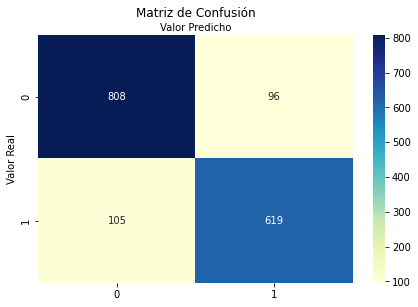

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
tn, fp, fn, tp = cnf_matrix.ravel()
specificity = tn / (tn+fp)
print("Specificity:",specificity)

Accuracy: 0.8765356265356266
Precision: 0.8657342657342657
Recall: 0.8549723756906077
Specificity: 0.8938053097345132


## **5. MODELO DE RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_forest = RandomForestClassifier(n_estimators=200, criterion='entropy', 
                                     random_state=123)
rnd_forest.fit(X_train, y_train)
y_pred = rnd_forest.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[890,  14],
       [ 20, 704]])

Text(0.5, 257.44, 'Valor Predicho')

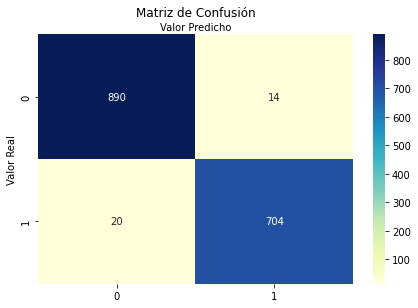

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
tn, fp, fn, tp = cnf_matrix.ravel()
specificity = tn / (tn+fp)
print("Specificity:",specificity)

Accuracy: 0.9791154791154791
Precision: 0.9805013927576601
Recall: 0.9723756906077348
Specificity: 0.9845132743362832


## **6.MODELO DE GBM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(learning_rate=0.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[867,  37],
       [ 51, 673]])

Text(0.5, 257.44, 'Valor Predicho')

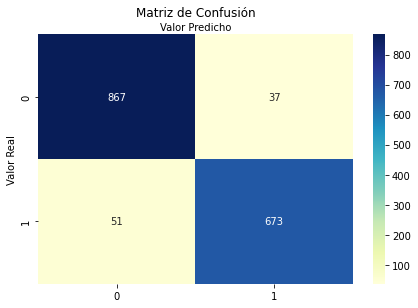

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
tn, fp, fn, tp = cnf_matrix.ravel()
specificity = tn / (tn+fp)
print("Specificity:",specificity)

Accuracy: 0.9459459459459459
Precision: 0.9478873239436619
Recall: 0.9295580110497238
Specificity: 0.959070796460177


## **7. ENSAMBLE SOFT VOTING**

In [ ]:
from sklearn.ensemble import VotingClassifier

lista_modelos = []
lista_modelos.append(('LR',  LogisticRegression()))
lista_modelos.append(('RF', RandomForestClassifier(n_estimators=200)))
lista_modelos.append(('GBM', GradientBoostingClassifier(learning_rate=0.01)))


soft_ensemble = VotingClassifier(estimators=lista_modelos, voting='soft')

soft_ensemble.fit(X_train, y_train)

y_pred_soft = soft_ensemble.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_soft)
cnf_matrix

array([[886,  18],
       [ 41, 683]])

Text(33.0, 0.5, 'Valor Real')

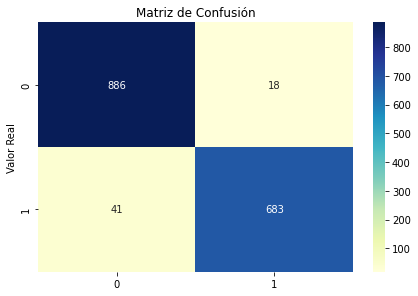

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor Real')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
tn, fp, fn, tp = cnf_matrix.ravel()
specificity = tn / (tn+fp)
print("Specificity:",specificity)

Accuracy: 0.9459459459459459
Precision: 0.9478873239436619
Recall: 0.9295580110497238
Specificity: 0.9800884955752213


## **8. CONCLUSION**

El modelo por el que optaria seria el de RF pero su matriz de confuncion se ve muy buena  y esto no siempre significa que esta bien, puede haber sufrido de un sobre ajuste, por lo que me quedo con el modelo GBM.